# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_26669/11108477.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


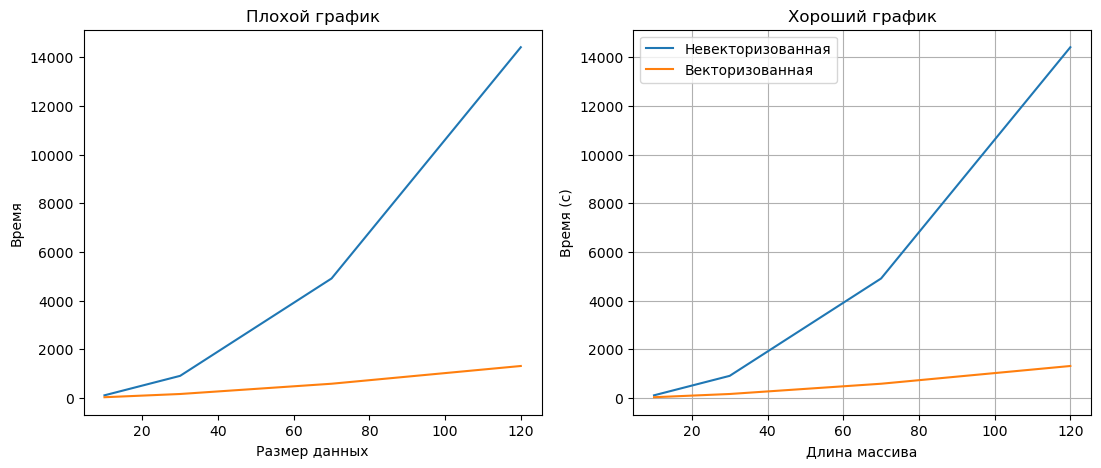

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functions import *
from functions_vectorized import *
import timeit
from timeit import Timer

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [16]:
data_size = np.array([5, 10, 20, 50, 100, 400, 600, 800, 1000, 2000, 4000, 5000, 7500, 9000, 10000, 12500, 13000, 14000, 15000])
time_non_vectorized, time_vectorized = [], []

for i in data_size:
    X = np.random.randint(-5, 5, (i, i))
    answer1 = prod_non_zero_diag_non_vect(X)
    answer2 = prod_non_zero_diag_vect(X)
    t = Timer(lambda: prod_non_zero_diag_non_vect(X))
    time_non_vectorized.append(t.timeit(number=500))
    t2 = Timer(lambda: prod_non_zero_diag_vect(X))
    time_vectorized.append(t2.timeit(number=500))
    if answer1 != answer2:
        print('Wrong!')

/Users/kseniashk/Downloads/task/functions.py:7: RuntimeWarning: overflow encountered in scalar multiply
  res *= x[i][i]


/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_26669/4097245897.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


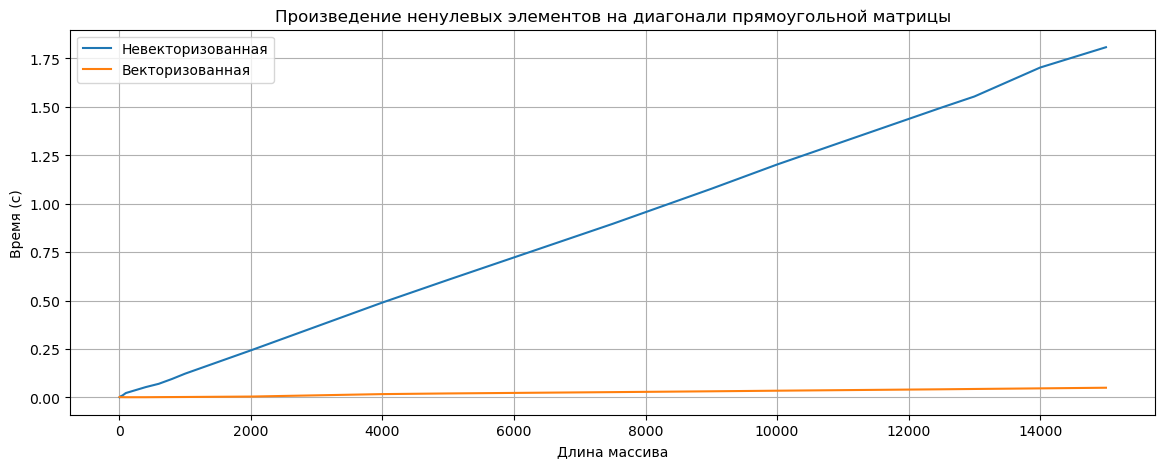

In [17]:
f, ax = plt.subplots(1, 1, figsize=(14, 5))

ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax.plot(data_size, time_vectorized, label=u"Векторизованная")
ax.set_title(u"Произведение ненулевых элементов на диагонали прямоугольной матрицы")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

f.show()  

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [2]:
data_size = np.array([5, 10, 20, 50, 100, 400, 600, 800, 1000, 2000, 4000, 5000, 10000, 50000, 10**5,
                      2 * (10**5), 3 * (10**5), 4 * (10**5), 5 * (10**5)])
time_non_vectorized, time_vectorized = [], []

for i in data_size:
    X = np.random.randint(-5, 5, i)
    Y = np.random.randint(-5, 5, i)
    answer1 = are_multisets_equal_non_vect(X, Y)
    answer2 = are_multisets_equal_vect(X, Y)
    t = Timer(lambda: are_multisets_equal_non_vect(X, Y))
    time_non_vectorized.append(t.timeit(number=500))
    t2 = Timer(lambda: are_multisets_equal_vect(X, Y))
    time_vectorized.append(t2.timeit(number=500))
    if answer1 != answer2:
        print('Wrong!')

/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_26669/3488181207.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


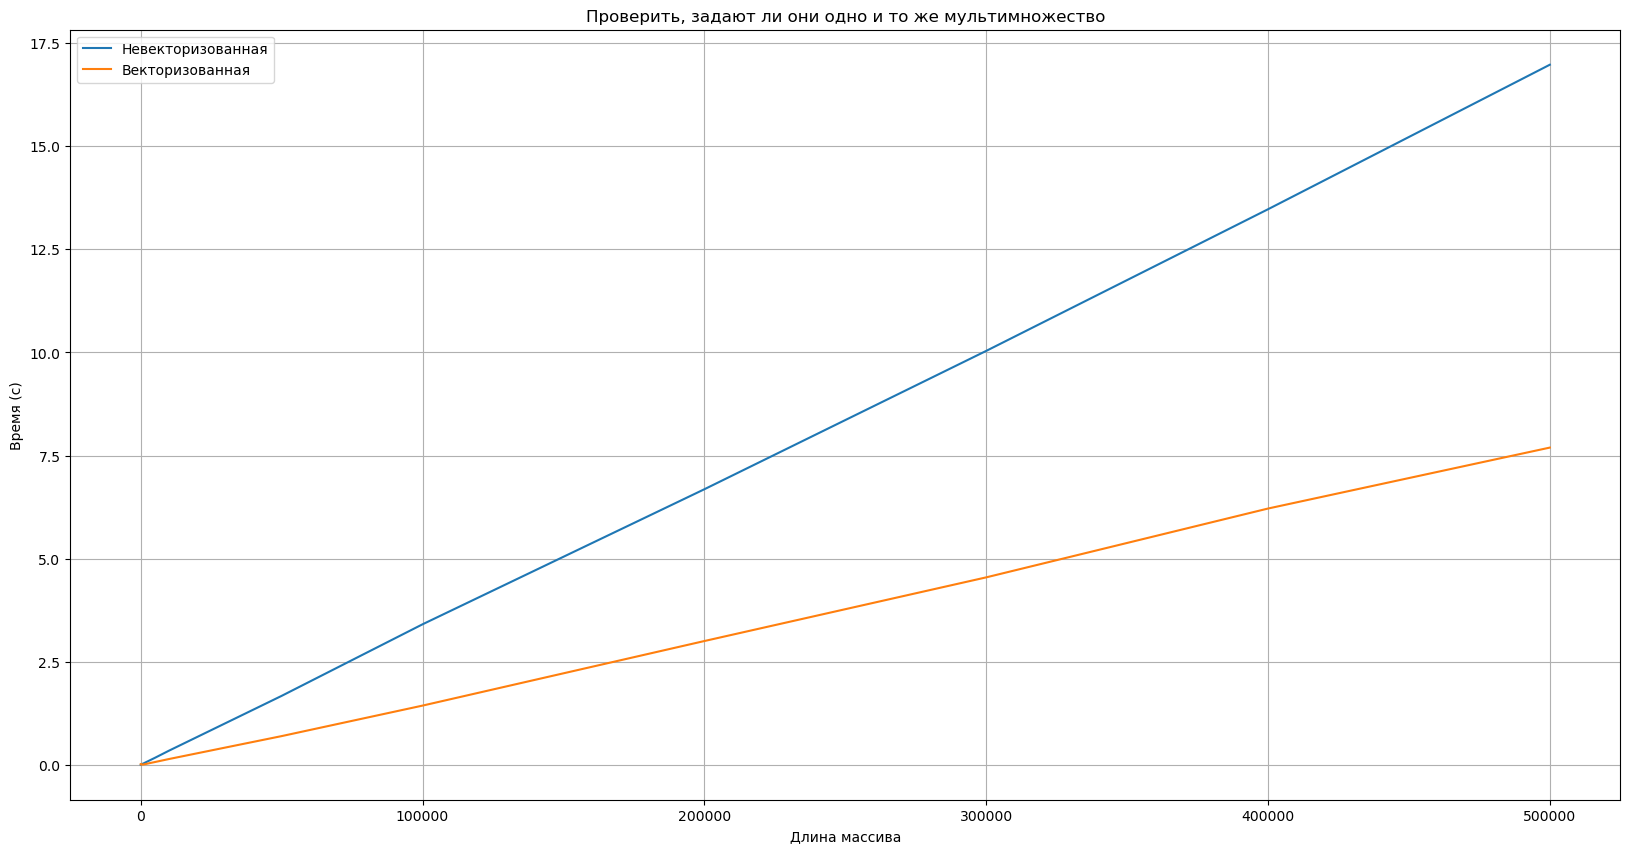

In [3]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax.plot(data_size, time_vectorized, label=u"Векторизованная")
ax.set_title(u"Проверить, задают ли они одно и то же мультимножество")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

f.show()  

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [4]:
data_size = np.array([50, 100, 400, 600, 800, 1000, 2000, 4000, 5000, 10000, 50000, 10**5,
                      2 * (10**5), 3 * (10**5), 4 * (10**5), 5 * (10**5)])
time_non_vectorized, time_vectorized = [], []

for i in data_size:
    X = np.random.randint(-5, 5, i)
    answer1 = max_after_zero_non_vect(X)
    answer2 = max_after_zero_vect(X)
    t = Timer(lambda: max_after_zero_non_vect(X))
    time_non_vectorized.append(t.timeit(number=500))
    t2 = Timer(lambda: max_after_zero_vect(X))
    time_vectorized.append(t2.timeit(number=500))
    if answer1 != answer2:
        print('Wrong!')
        print(X, answer1, answer2)

/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_26669/3811722672.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


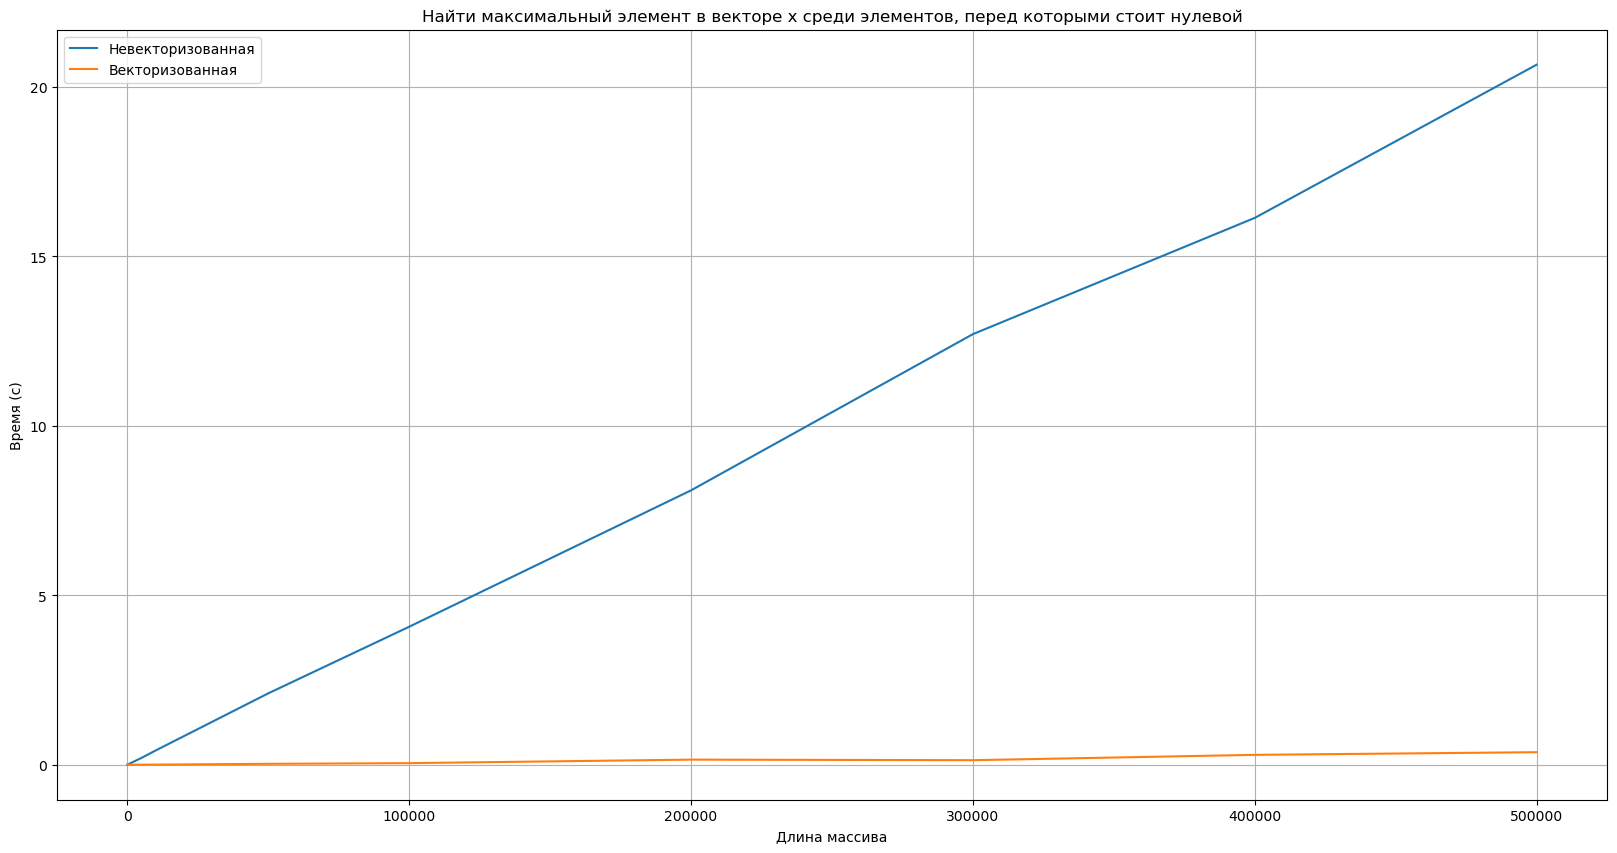

In [5]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax.plot(data_size, time_vectorized, label=u"Векторизованная")
ax.set_title(u"Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

f.show()  

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_26669/239083015.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


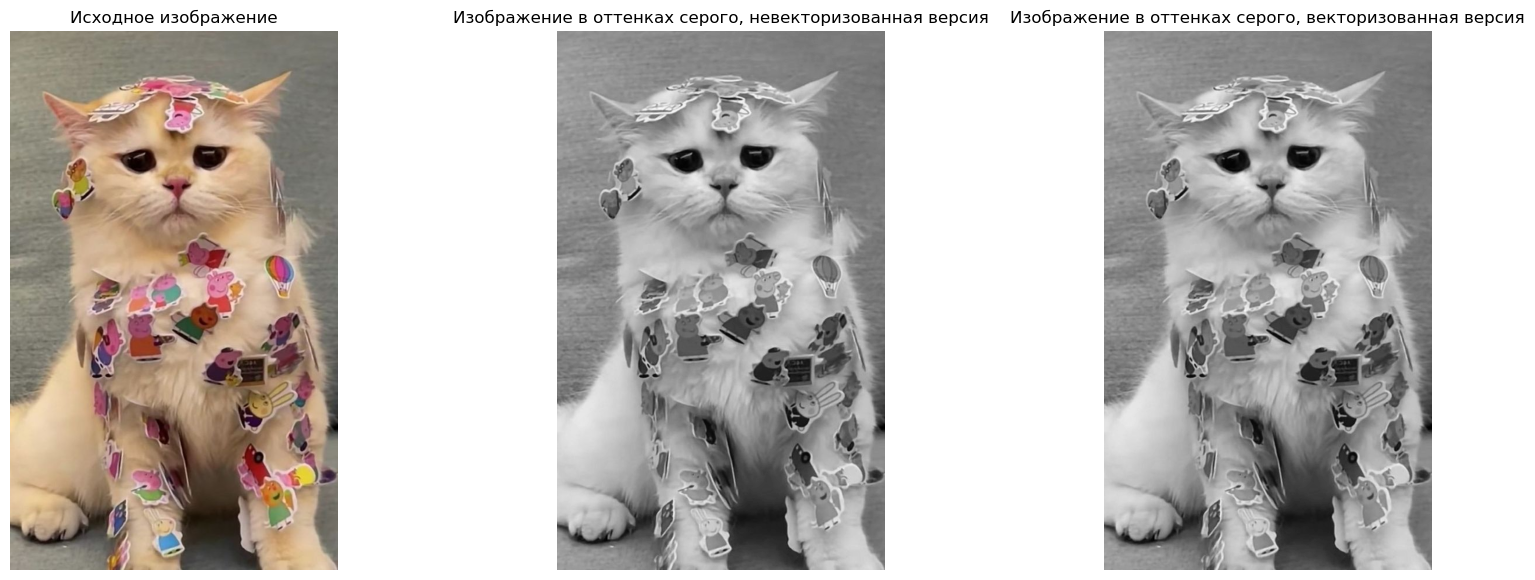

In [18]:
from matplotlib.pyplot import imread, imshow
img = imread('котик.png')
coeff = np.array([0.299, 0.587, 0.114])
img2 = convert_image_non_vect(img, coeff)
img3 = convert_image_vect(img, coeff)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

ax1.imshow(img)
ax1.set_title('Исходное изображение')
ax1.axis('off')

ax2.imshow(img2, cmap='gray')
ax2.set_title('Изображение в оттенках серого, невекторизованная версия')
ax2.axis('off')

ax3.imshow(img3, cmap='gray')
ax3.set_title('Изображение в оттенках серого, векторизованная версия')
ax3.axis('off')

fig.show()

In [7]:
data_size = np.array([5, 10, 20, 50, 100, 400, 600, 800, 1000])
                      #2000, 4000, 5000, 7500, 9000, 10000, 12500, 13000, 14000, 15000])
time_non_vectorized, time_vectorized = [], []

for i in data_size:
    X = np.random.randint(-5, 5, (i, i, 5))
    c = np.random.random(5)
    answer1 = convert_image_non_vect(X, c)
    answer2 = convert_image_vect(X, c)
    t = Timer(lambda: convert_image_non_vect(X, c))
    time_non_vectorized.append(t.timeit(number=50))
    t2 = Timer(lambda: convert_image_vect(X, c))
    time_vectorized.append(t2.timeit(number=50))
    if np.array_equal(answer1, answer2) == False:
        print('Wrong!')

/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_26669/2880304428.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


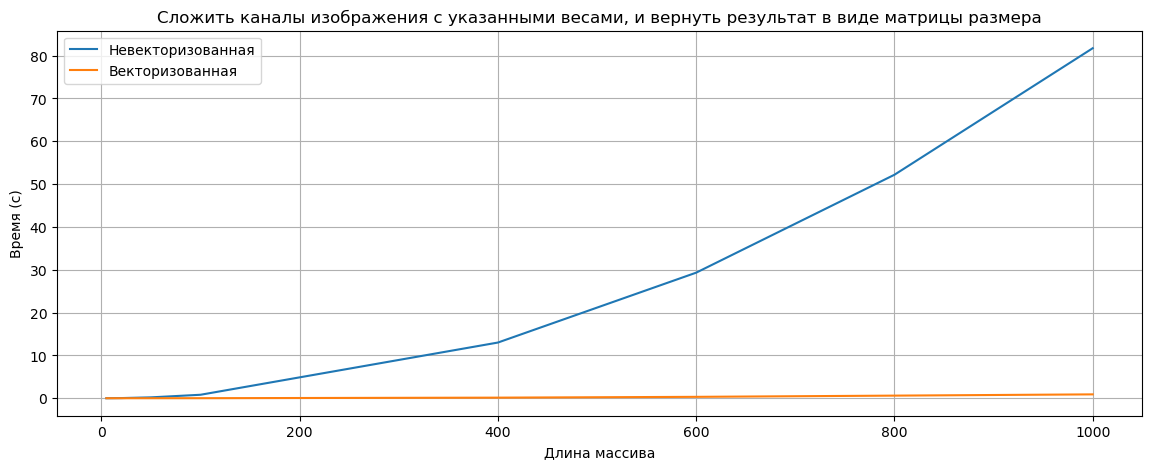

In [8]:
f, ax = plt.subplots(1, 1, figsize=(14, 5))

ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax.plot(data_size, time_vectorized, label=u"Векторизованная")
ax.set_title(u"Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

f.show()  

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [9]:
from functions import *
from functions_vectorized import *
import timeit
from timeit import Timer

data_size = np.array([50, 100, 400, 600, 800, 1000, 2000, 4000, 5000, 10000, 50000, 10**5,
                      2 * (10**5), 3 * (10**5), 4 * (10**5), 5 * (10**5)])
time_non_vectorized, time_vectorized = [], []

for i in data_size:
    X = np.random.randint(-5, 5, i)
    answer1 = run_length_encoding_non_vect(X)
    answer2 = run_length_encoding_vect(X)
    t = Timer(lambda: run_length_encoding_non_vect(X))
    time_non_vectorized.append(t.timeit(number=500))
    t2 = Timer(lambda: run_length_encoding_vect(X))
    time_vectorized.append(t2.timeit(number=500))
    if np.array_equal(answer1, answer2) == False:
        print('Wrong!')

/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_26669/799250454.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


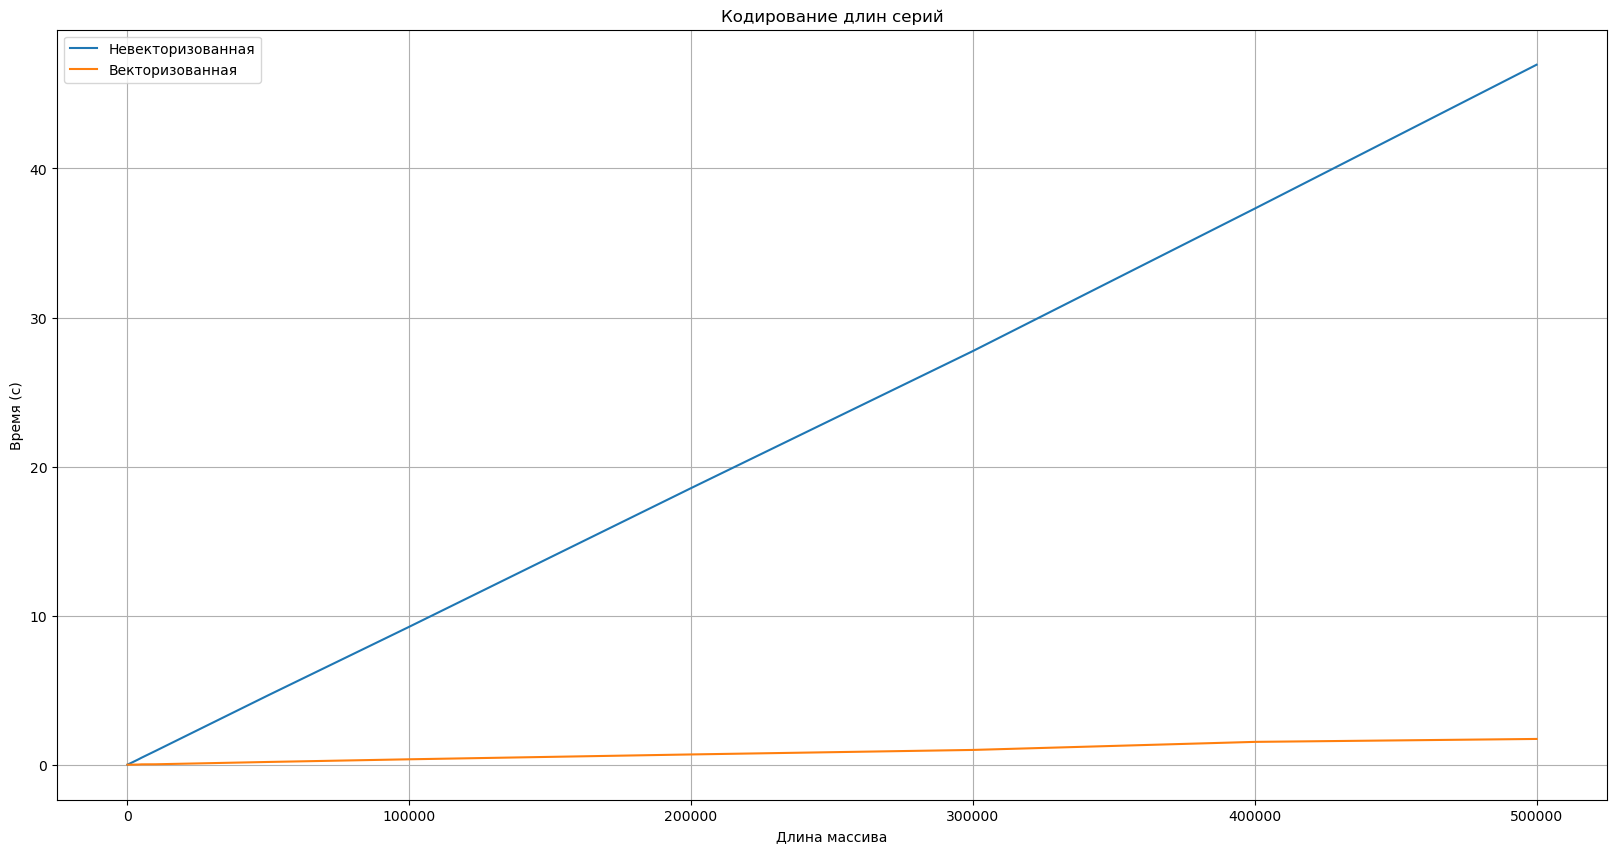

In [10]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))

ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax.plot(data_size, time_vectorized, label=u"Векторизованная")
ax.set_title(u"Кодирование длин серий")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

f.show()  

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [14]:
from scipy.spatial.distance import cdist

data_size = np.array([5, 10, 20, 50, 80, 100, 115, 135, 150])
                      #2000, 4000, 5000, 7500, 9000, 10000, 12500, 13000, 14000, 15000])
time_non_vectorized, time_vectorized, time_cdist = [], [], []

for i in data_size:
    X = np.random.randint(-5, 5, (i, i))
    Y = np.random.randint(-5, 5, (i, i))
    answer1 = pairwise_distance_non_vect(X, Y)
    answer2 = pairwise_distance_vect(X, Y)
    answer3 = cdist(X, Y)
    t = Timer(lambda: pairwise_distance_non_vect(X, Y))
    time_non_vectorized.append(t.timeit(number=50))
    t2 = Timer(lambda: pairwise_distance_vect(X, Y))
    time_vectorized.append(t2.timeit(number=50))
    t3 = Timer(lambda: cdist(X, Y))
    time_cdist.append(t3.timeit(number=50))
    if np.array_equal(answer1, answer2) == False or np.array_equal(answer1, answer3) == False:
        print('Wrong!')

/var/folders/vb/1jpw8q5j7wq2fm0t1yswkvt80000gn/T/ipykernel_26669/353190588.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


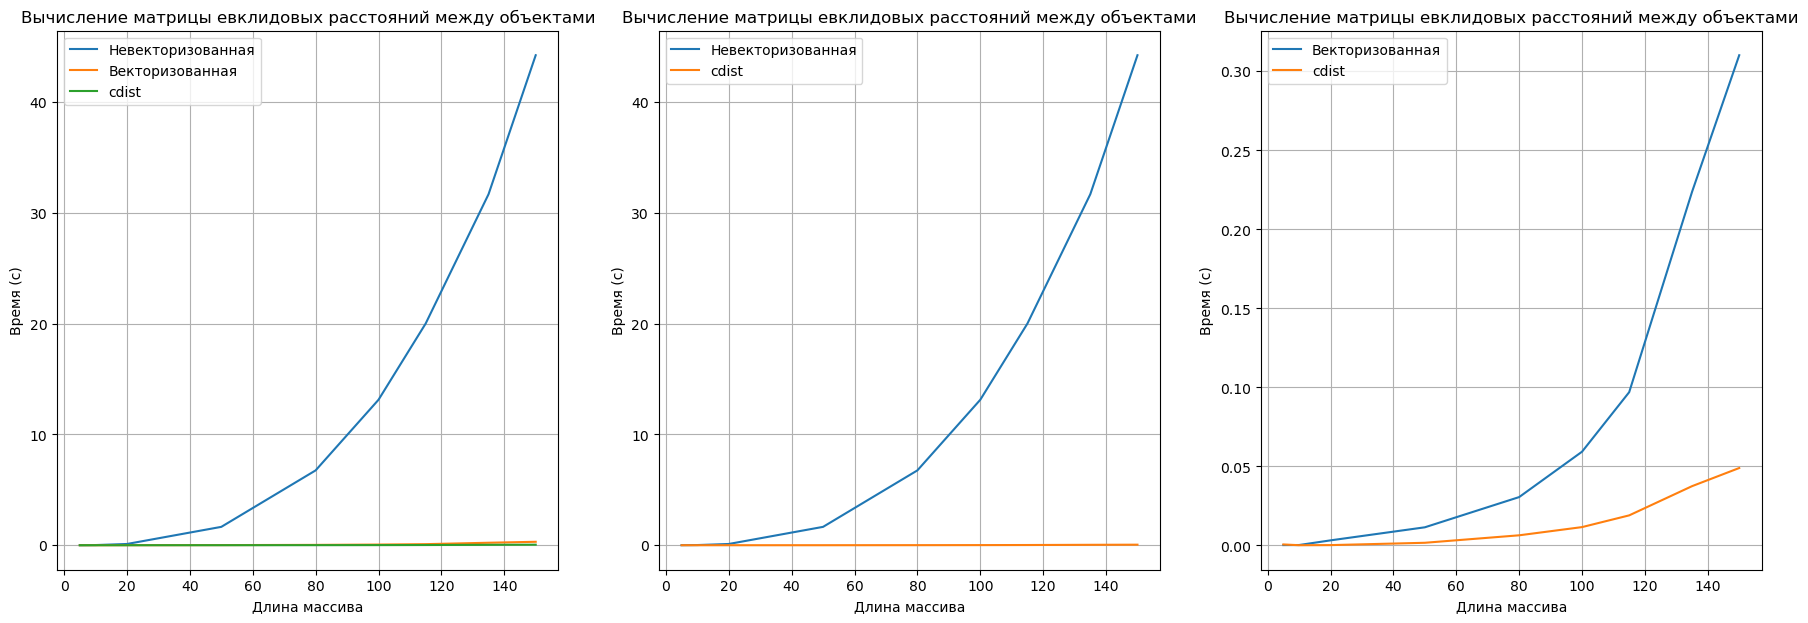

In [15]:
f, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 7))

ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax.plot(data_size, time_vectorized, label=u"Векторизованная")
ax.plot(data_size, time_cdist, label=u"cdist")
ax.set_title(u"Вычисление матрицы евклидовых расстояний между объектами")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_cdist, label=u"cdist")
ax2.set_title(u"Вычисление матрицы евклидовых расстояний между объектами")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

ax3.plot(data_size, time_vectorized, label=u"Векторизованная")
ax3.plot(data_size, time_cdist, label=u"cdist")
ax3.set_title(u"Вычисление матрицы евклидовых расстояний между объектами")
ax3.set_xlabel(u"Длина массива")
ax3.set_ylabel(u"Время (с)")
ax3.grid()
ax3.legend()

f.show()  

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [13]:
import markdown
print(markdown.markdown("""
Я не знаю что нужно писать в отчете!
=============
- очень удобно
- красиво
- полезно
# Про все остальное я могу сказать, что векторизованные версии сильно быстрее, чем невекторизованные
__numpy__ отличная вещь

*Источник картинки*:
<https://ru.pinterest.com/pin/170433167141367266/>
"""))

<h1>Я не знаю что нужно писать в отчете!</h1>
<ul>
<li>очень удобно</li>
<li>красиво</li>
<li>полезно</li>
</ul>
<h1>Про все остальное я могу сказать, что векторизованные версии сильно быстрее, чем невекторизованные</h1>
<p><strong>numpy</strong> отличная вещь</p>
<p><em>Источник картинки</em>:
<a href="https://ru.pinterest.com/pin/170433167141367266/">https://ru.pinterest.com/pin/170433167141367266/</a></p>


Я не знаю что нужно писать в отчете!
=============
- очень удобно
- красиво
- полезно
# Про все остальное я могу сказать, что векторизованные версии сильно быстрее, чем невекторизованные
__numpy__ отличная вещь

*Источник картинки*: <https://ru.pinterest.com/pin/170433167141367266/>